In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("../../../Bigdata Files/student_score.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
X=df.drop("Scores",axis=1).values
y=df["Scores"].values

In [5]:
X.shape,y.shape

((25, 1), (25,))

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
y_pred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [8]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

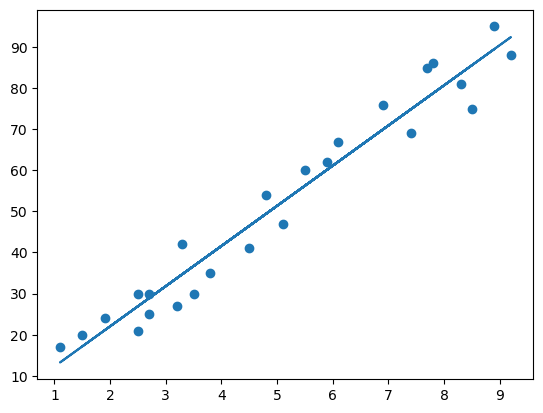

In [11]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [9]:
print("MAPE",mean_absolute_percentage_error(y,y_pred))
print("R2 Score",r2_score(y,y_pred))

MAPE 0.11822090846452975
R2 Score 0.9529481969048356


# Applying Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X)
X_poly

array([[  1.   ,   2.5  ,   6.25 ,  15.625],
       [  1.   ,   5.1  ,  26.01 , 132.651],
       [  1.   ,   3.2  ,  10.24 ,  32.768],
       [  1.   ,   8.5  ,  72.25 , 614.125],
       [  1.   ,   3.5  ,  12.25 ,  42.875],
       [  1.   ,   1.5  ,   2.25 ,   3.375],
       [  1.   ,   9.2  ,  84.64 , 778.688],
       [  1.   ,   5.5  ,  30.25 , 166.375],
       [  1.   ,   8.3  ,  68.89 , 571.787],
       [  1.   ,   2.7  ,   7.29 ,  19.683],
       [  1.   ,   7.7  ,  59.29 , 456.533],
       [  1.   ,   5.9  ,  34.81 , 205.379],
       [  1.   ,   4.5  ,  20.25 ,  91.125],
       [  1.   ,   3.3  ,  10.89 ,  35.937],
       [  1.   ,   1.1  ,   1.21 ,   1.331],
       [  1.   ,   8.9  ,  79.21 , 704.969],
       [  1.   ,   2.5  ,   6.25 ,  15.625],
       [  1.   ,   1.9  ,   3.61 ,   6.859],
       [  1.   ,   6.1  ,  37.21 , 226.981],
       [  1.   ,   7.4  ,  54.76 , 405.224],
       [  1.   ,   2.7  ,   7.29 ,  19.683],
       [  1.   ,   4.8  ,  23.04 , 110.592],
       [  

In [14]:
X_poly.shape

(25, 4)

In [22]:
poly.fit(X_poly,y)
model=LinearRegression()
model.fit(X_poly,y)
y_poly=model.predict(X_poly)
y_poly

array([25.55820366, 52.4044897 , 31.56390366, 85.43535572, 34.50588455,
       19.71935048, 88.24070983, 57.10586101, 84.27233622, 27.13600857,
       79.9579611 , 61.75002055, 45.40692604, 32.52310457, 18.5131056 ,
       87.29327399, 25.55820366, 21.60788253, 64.02753655, 77.39372855,
       27.13600857, 48.88540147, 37.62366789, 72.62482165, 80.75625387])

In [23]:
df_error=pd.DataFrame({"Actual_val":y,"Simple_LR":y_pred,"Poly_R":y_poly})

In [24]:
df_error

,Actual_val,Simple_LR,Poly_R
0,21,26.923182,25.558204
1,47,52.340271,52.404490
2,27,33.766244,31.563904
3,75,85.578002,85.435356
4,30,36.698985,34.505885
5,20,17.147378,19.719350
6,88,92.421065,88.240710
7,60,56.250592,57.105861
8,81,83.622842,84.272336
9,25,28.878343,27.136009


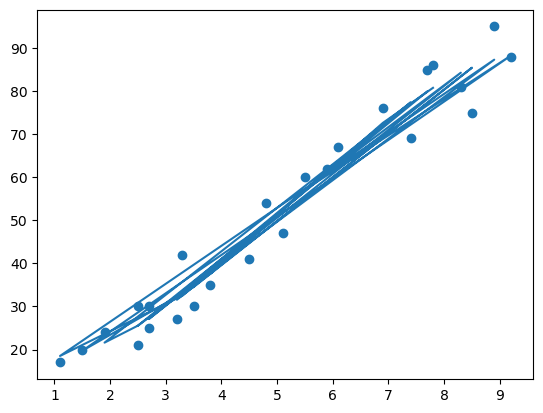

In [25]:
plt.scatter(X,y)
plt.plot(X,y_poly)

In [26]:
print("Error of Polynomial regression is",mean_absolute_percentage_error(y,y_poly))
print("R2 Score of Polynomial Regression",r2_score(y,y_poly))

Error of Polynomial regression is 0.0932854066804236
R2 Score of Polynomial Regression 0.9605718236355054
